Для выполнения домашнего задания необходимо взять boston house-prices datase (sklearn.datasets.load_boston) и сделать тоже самое для задачи регрессии (попробовать разные алгоритмы, поподбирать параметры, вывести итоговое качество).

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from jupyterthemes import jtplot
jtplot.style(theme='grade3')
from sklearn.datasets import load_boston
import seaborn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.svm import SVR
from scipy.stats import uniform
from sklearn.neighbors import KNeighborsRegressor

In [5]:
houses = load_boston() 
print(houses['DESCR'])
houses = pd.concat([pd.DataFrame(houses['data'],columns=houses['feature_names']),pd.Series(houses['target'],name='MEDV')],axis=1)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
houses.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


# Подготовка данных

In [8]:
print(len(houses))
print([col_name for col_name in houses.columns if houses[col_name].isnull().sum()>0])

506
[]


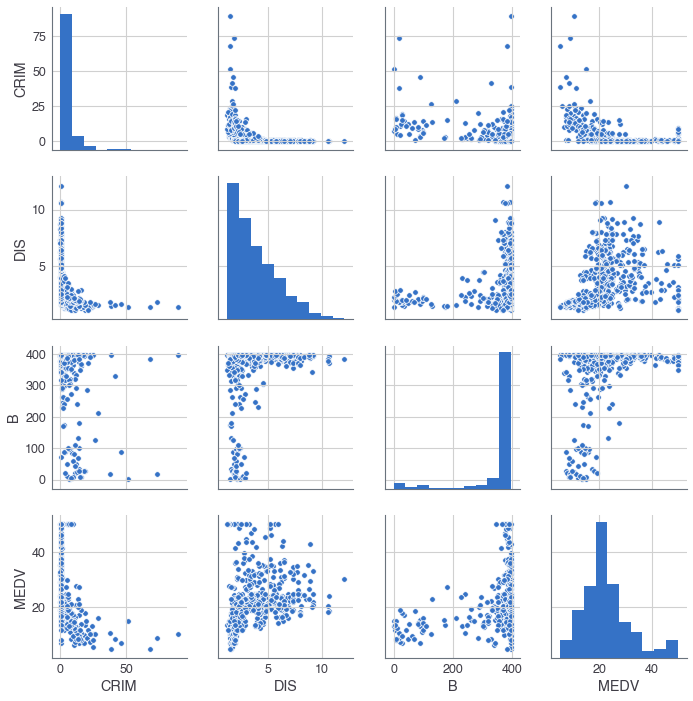

In [10]:
seaborn.pairplot(houses[['CRIM','DIS','B','MEDV']])

In [11]:
houses.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
houses.MEDV.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

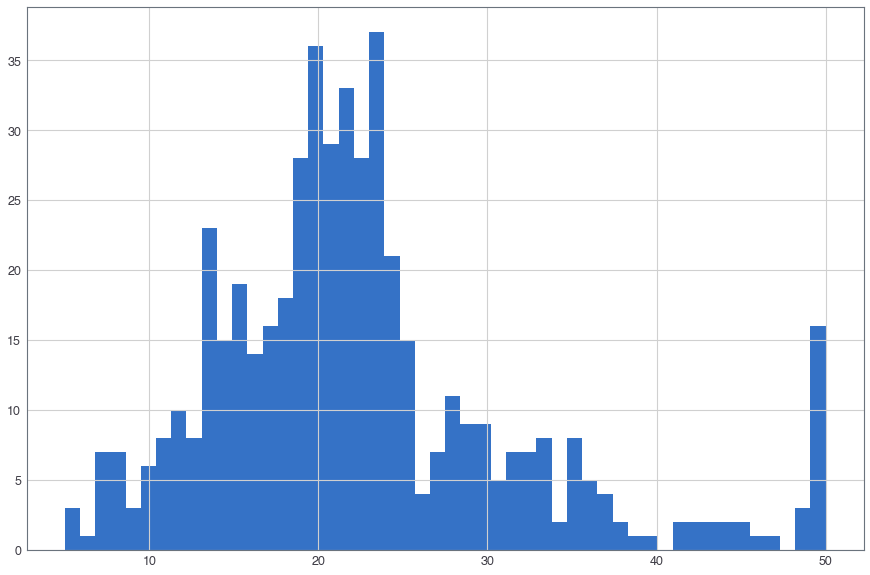

In [13]:
plt.figure(figsize=(15,10))
plt.hist(houses.MEDV,bins=50)
plt.show()

In [14]:
y = houses.MEDV
X_raw = houses.drop(['MEDV'],axis=1)

In [17]:
ss = StandardScaler()
X = pd.DataFrame(ss.fit_transform(X_raw),columns=X_raw.columns)

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.1,random_state=42)
assert len(X) == (len(X_train)+len(X_test))

In [20]:
models = {}
predictions = {}
scores = {}

# Случайный лес

In [23]:
params = {'n_estimators':np.linspace(10,1000,500,dtype=int),
          'max_depth':np.linspace(5,100,50,dtype=int),
          'min_samples_leaf':[1,5,10,20,30,40],
          'max_features':np.linspace(.1,1,100)}

rand_rf = RandomizedSearchCV(RandomForestRegressor(criterion='mae',random_state=42),
                             param_distributions=params,
                             cv=5,
                             n_iter=100,
                             n_jobs=-1,
                             random_state=42,
                             verbose=1)
rand_rf.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   53.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 10.1min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mae',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

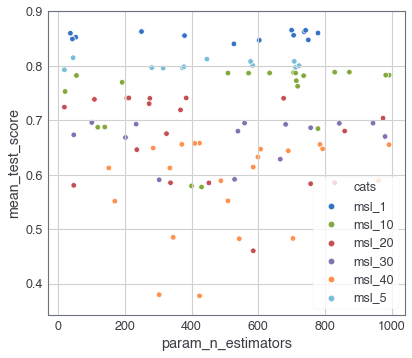

In [24]:
rand_rf_res = pd.DataFrame(rand_rf.cv_results_)
rand_rf_res['cats'] = ('msl_'+rand_rf_res.param_min_samples_leaf.astype(str)).astype('category')

seaborn.scatterplot(x='param_n_estimators',y='mean_test_score',
                   hue='cats',
                   data=rand_rf_res)
plt.legend(loc='lower right')
plt.show()

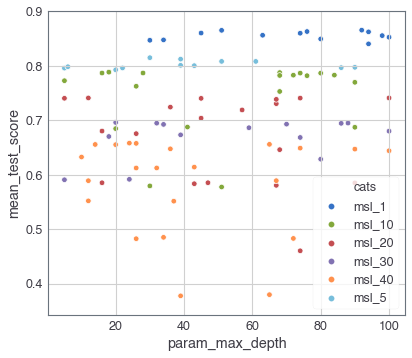

In [25]:
seaborn.scatterplot(x='param_max_depth',y='mean_test_score',
                   hue='cats',
                   data=rand_rf_res)
plt.legend(loc='lower right')
plt.show()

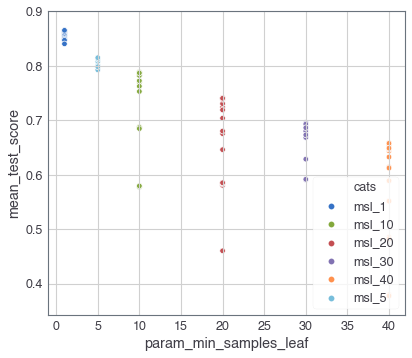

In [26]:
seaborn.scatterplot(x='param_min_samples_leaf',y='mean_test_score',
                   hue='cats',
                   data=rand_rf_res)
plt.legend(loc='lower right')
plt.show()

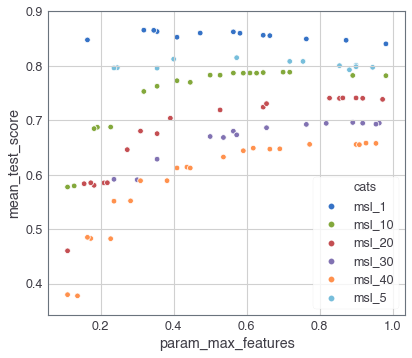

In [27]:
seaborn.scatterplot(x='param_max_features',y='mean_test_score',
                   hue='cats',
                   data=rand_rf_res)
plt.legend(loc='lower right')
plt.show()

In [28]:
print(rand_rf.best_score_)
print(rand_rf.best_params_)

0.8655873994220091
{'n_estimators': 700, 'min_samples_leaf': 1, 'max_features': 0.3181818181818182, 'max_depth': 92}


In [29]:
params = {'n_estimators':[10,50,100,200],
          'max_depth':np.linspace(40,60,4,dtype=int),
          'min_samples_leaf':[1,5],
          'max_features':np.linspace(.5,.7,5)}
grid_rf = GridSearchCV(  RandomForestRegressor(criterion='mae',random_state=42),
                         param_grid=params,
                         cv=5,
                         n_jobs=-1,
                         verbose=1)
grid_rf.fit(X_train,y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   29.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:  4.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mae', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [30]:
print(grid_rf.best_score_)
print(grid_rf.best_params_)

0.8609082439013356
{'max_depth': 40, 'max_features': 0.5, 'min_samples_leaf': 1, 'n_estimators': 200}


In [32]:
models['RandomForest'] = grid_rf.best_estimator_
predictions['RandomForest'] = grid_rf.predict(X_test)
scores['Randomforest'] = {'MAE':mean_absolute_error(y_test,predictions['RandomForest']), 
                          'MSE':mean_squared_error(y_test,predictions['RandomForest'])}
print(f"Random Forest results on hold-out:\nMAE = {scores['Randomforest']['MAE']:.2f}\n"\
      f"MSE = {scores['Randomforest']['MSE']:.2f}")

Random Forest results on hold-out:
MAE = 1.76
MSE = 6.06


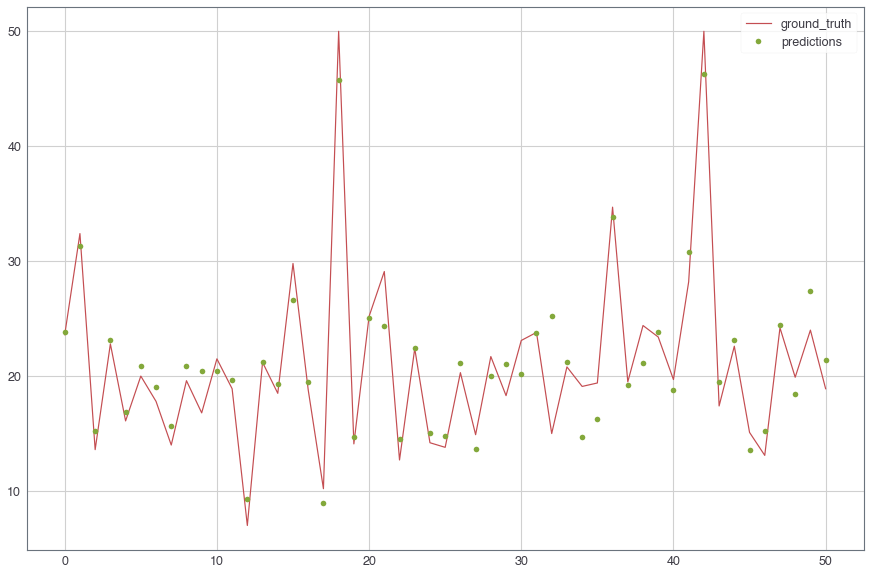

In [33]:
plt.figure(figsize=(15,10))
plt.plot(range(len(y_test)),y_test,'r',label='ground_truth')
plt.plot(range(len(y_test)),predictions['RandomForest'],'go',label='predictions')
plt.legend()
plt.show()

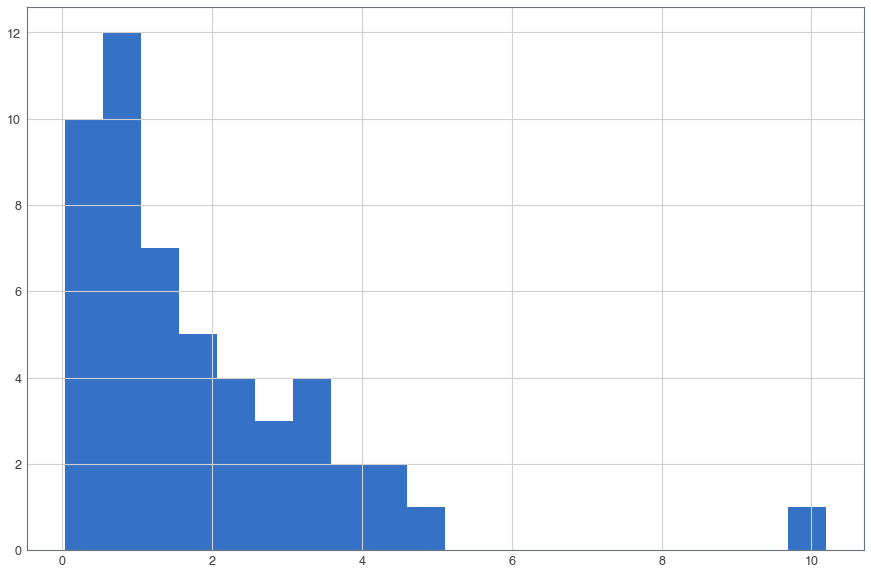

In [34]:
plt.figure(figsize=(15,10))
plt.hist(np.abs(y_test-predictions['RandomForest']),bins=20)
plt.show()

# Линейная модель

In [36]:
params = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
          'C':uniform()}
rand_svm = RandomizedSearchCV(SVR(),random_state=42,param_distributions=params,n_iter=500,cv=5,n_jobs=-1,verbose=1)
rand_svm.fit(X_train,y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 1400 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:   14.1s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=500, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a25cd6400>,
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=1)

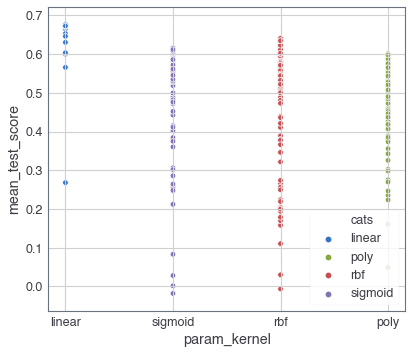

In [37]:
rand_svm_res = pd.DataFrame(rand_svm.cv_results_)
rand_svm_res['cats'] = rand_svm_res.param_kernel.astype('category')

seaborn.scatterplot(x='param_kernel',y='mean_test_score',
                   hue='cats',
                   data=rand_svm_res)
plt.legend(loc='lower right')
plt.show()

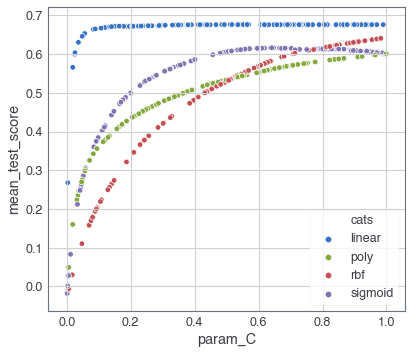

In [38]:
seaborn.scatterplot(x='param_C',y='mean_test_score',
                   hue='cats',
                   data=rand_svm_res)
plt.legend(loc='lower right')
plt.show()

In [39]:
params = {'kernel':['linear'],
          'C':np.linspace(.2,1,100)}
grid_svm = GridSearchCV(SVR(),param_grid=params,cv=5,n_jobs=-1,verbose=1)
grid_svm.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([0.2       , 0.20808081, 0.21616162, 0.22424242, 0.23232323,
       0.24040404, 0.24848485, 0.25656566, 0.26464646, 0.27272727,
       0.28080808, 0.28888...
       0.80606061, 0.81414141, 0.82222222, 0.83030303, 0.83838384,
       0.84646465, 0.85454545, 0.86262626, 0.87070707, 0.87878788,
       0.88686869, 0.89494949, 0.9030303 , 0.91111111, 0.91919192,
       0.92727273, 0.93535354, 0.94343434, 0.95151515, 0.95959596,
       0.96767677, 0.97575758, 0.98383838, 0.99191919, 1.        ]),
                         'kernel': ['linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scor

In [40]:
print(rand_svm.best_score_)
print(rand_svm.best_params_)

0.6762679316690599
{'C': 0.5690814691657476, 'kernel': 'linear'}


In [41]:
print(grid_svm.best_score_)
print(grid_svm.best_params_)

0.6762702755192141
{'C': 0.5717171717171717, 'kernel': 'linear'}


In [42]:
models['SVM'] = grid_svm.best_estimator_
predictions['SVM'] = models['SVM'].predict(X_test)
scores['SVM'] = {'MAE':mean_absolute_error(y_test,predictions['SVM']), 
                  'MSE':mean_squared_error(y_test,predictions['SVM'])}
print(f"SVM results on hold-out:\nMAE = {scores['SVM']['MAE']:.2f}\n"\
      f"MSE = {scores['SVM']['MSE']:.2f}")

SVM results on hold-out:
MAE = 2.46
MSE = 13.49


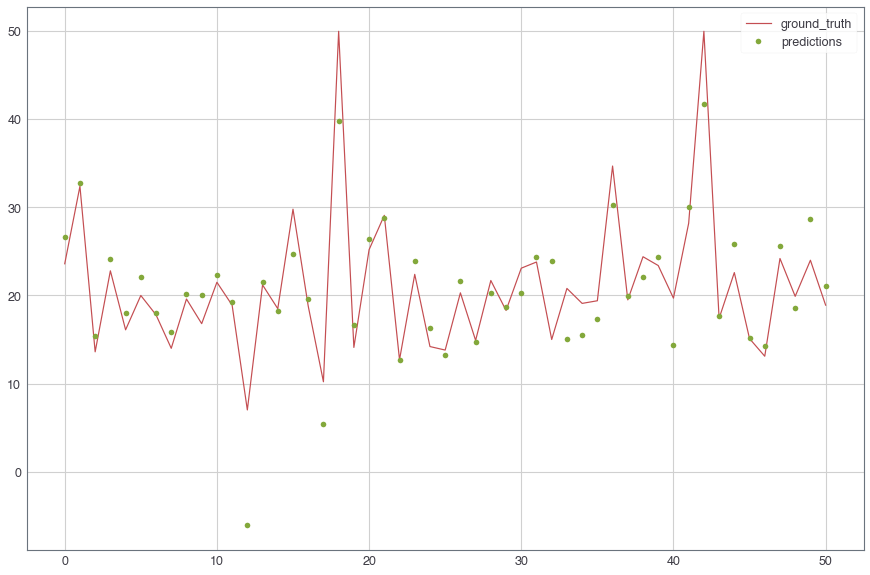

In [43]:
plt.figure(figsize=(15,10))
plt.plot(range(len(y_test)),y_test,'r',label='ground_truth')
plt.plot(range(len(y_test)),predictions['SVM'],'go',label='predictions')
plt.legend()
plt.show()

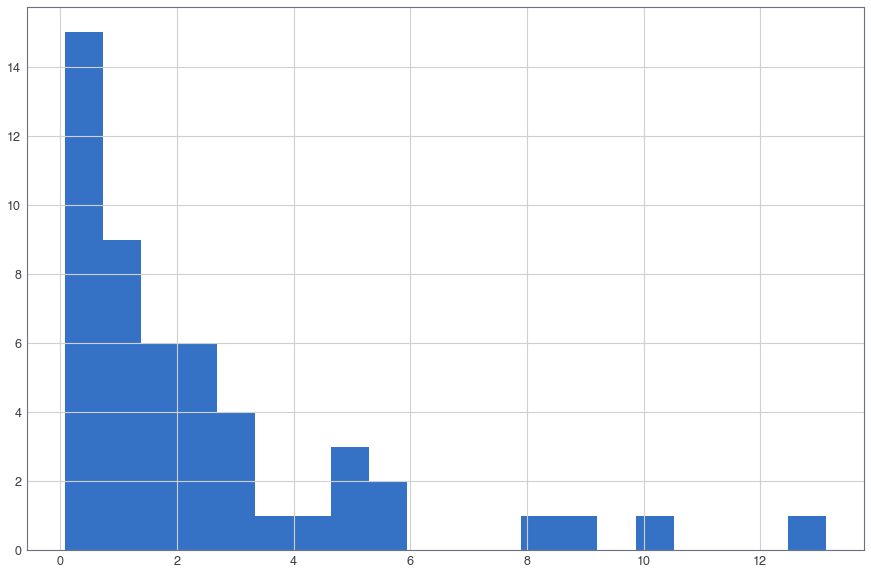

In [44]:
plt.figure(figsize=(15,10))
plt.hist(np.abs(y_test-predictions['SVM']),bins=20)
plt.show()

# KNN

In [46]:
params = {'n_neighbors':range(1,31),
          'metric':['minkowski'],
          'p':np.linspace(1,5,20)}
grid_knn = GridSearchCV(KNeighborsRegressor(),param_grid=params,cv=5,n_jobs=-1,verbose=1)
grid_knn.fit(X_train,y_train)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 2680 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed:   17.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'metric': ['minkowski'], 'n_neighbors': range(1, 31),
                         'p': array([1.        , 1.21052632, 1.42105263, 1.63157895, 1.84210526,
       2.05263158, 2.26315789, 2.47368421, 2.68421053, 2.89473684,
       3.10526316, 3.31578947, 3.52631579, 3.73684211, 3.94736842,
       4.15789474, 4.36842105, 4.57894737, 4.78947368, 5.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [47]:
print(grid_knn.best_score_)
print(grid_knn.best_params_)

0.806546130765015
{'metric': 'minkowski', 'n_neighbors': 2, 'p': 1.2105263157894737}


In [48]:
models['KNN'] = grid_knn.best_estimator_
predictions['KNN'] = models['KNN'].predict(X_test)
scores['KNN'] = {'MAE':mean_absolute_error(y_test,predictions['KNN']), 
                  'MSE':mean_squared_error(y_test,predictions['KNN'])}
print(f"KNN results on hold-out:\nMAE = {scores['KNN']['MAE']:.2f}\n"\
      f"MSE = {scores['KNN']['MSE']:.2f}")

KNN results on hold-out:
MAE = 2.14
MSE = 7.73


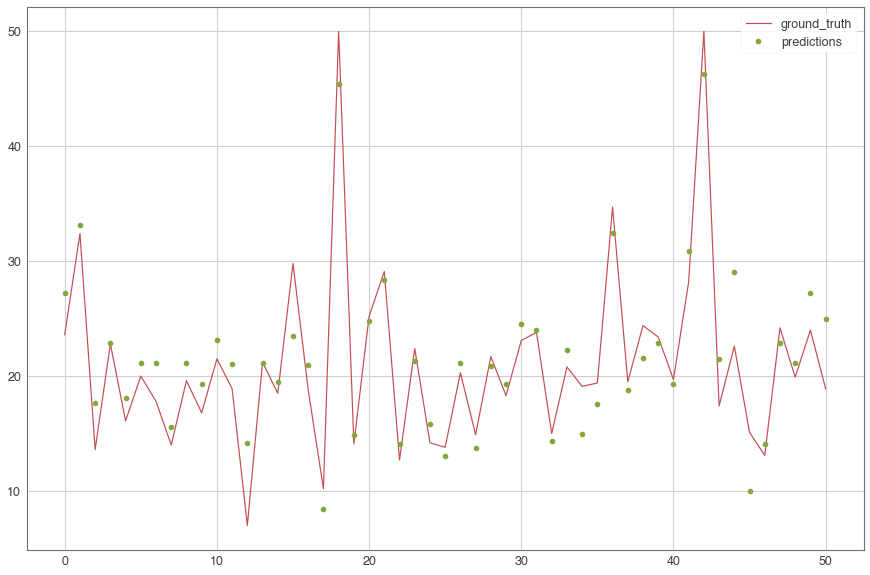

In [49]:
plt.figure(figsize=(15,10))
plt.plot(range(len(y_test)),y_test,'r',label='ground_truth')
plt.plot(range(len(y_test)),predictions['KNN'],'go',label='predictions')
plt.legend()
plt.show()

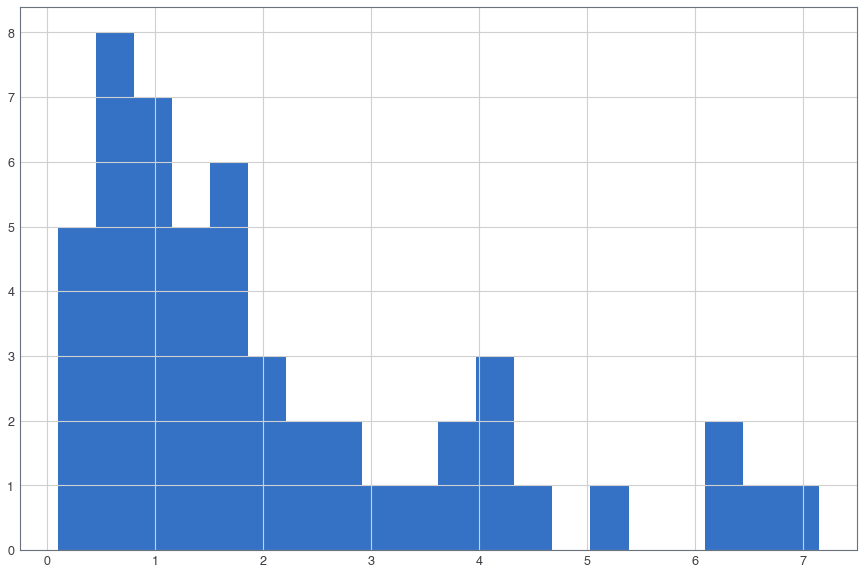

In [50]:
plt.figure(figsize=(15,10))
plt.hist(np.abs(y_test-predictions['KNN']),bins=20)
plt.show()

# Сравнение результатов качества моделей

In [51]:
for k in scores:
    print(f"{k}\tMAE={scores[k]['MAE']:.2f}\tMSE={scores[k]['MSE']:.2f}")

Randomforest	MAE=1.76	MSE=6.06
SVM	MAE=2.46	MSE=13.49
KNN	MAE=2.14	MSE=7.73


По метрикам MAE и MSE модель RandomForest работает намного лучше остальных.

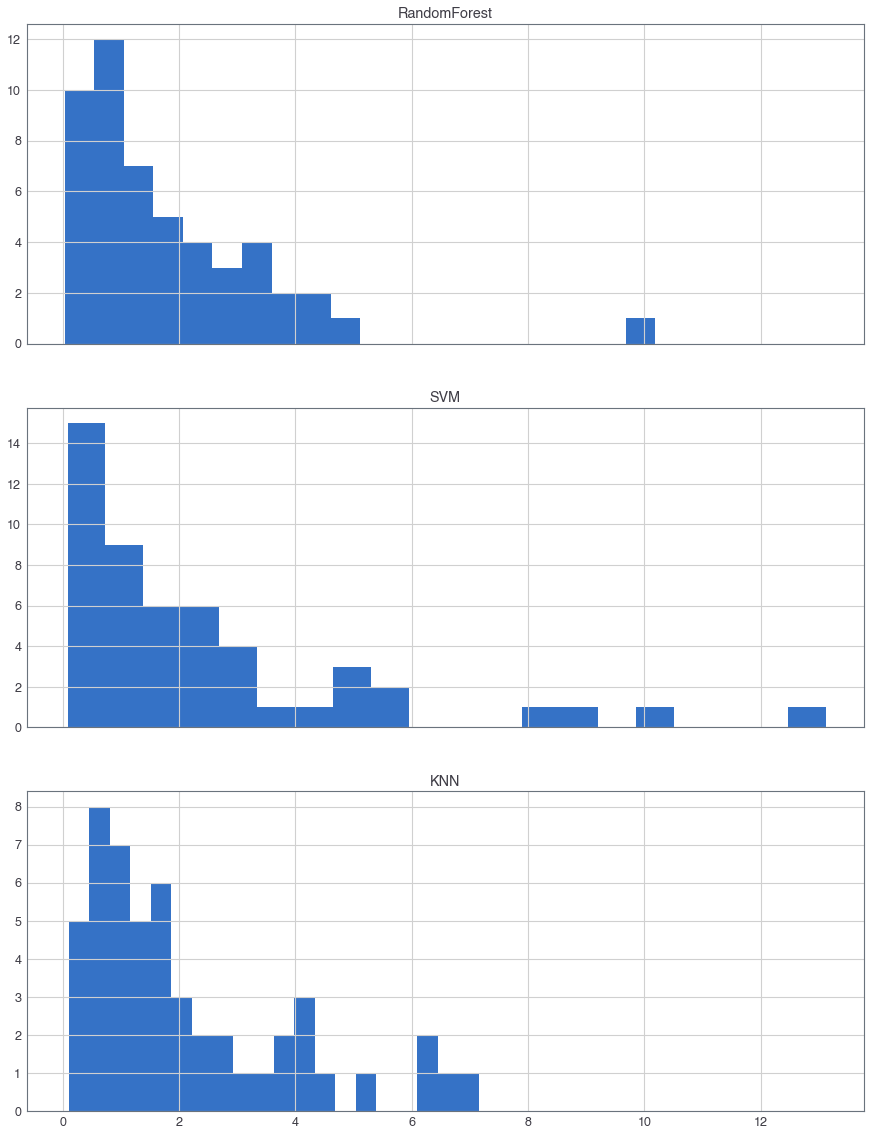

In [52]:
f,axis = plt.subplots(len(predictions),1,figsize=(15,20),sharex=True)
for i,k in enumerate(predictions):
    axis[i].hist(np.abs(y_test-predictions[k]),bins=20)
    axis[i].set_title(k)
plt.show()

Гистограммы ошибок показывают, что RandomForest делает меньшие ошибки, в то время как у KNN в абсолютных величинах почти нет ошибок.

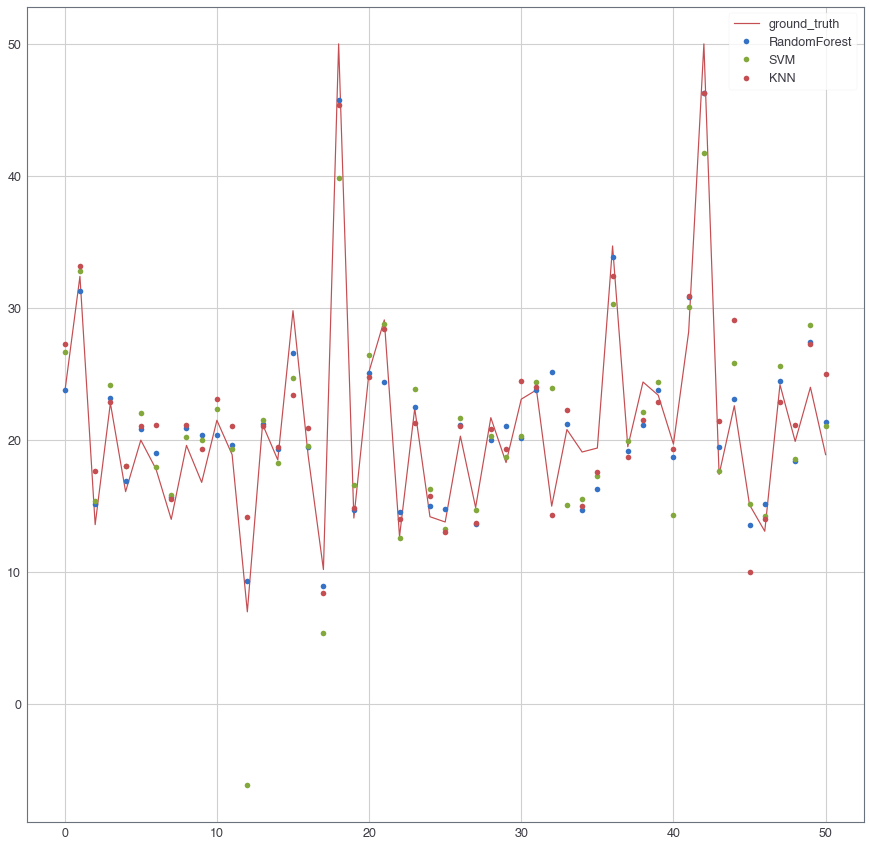

In [53]:
plt.figure(figsize=(15,15))
plt.plot(range(len(y_test)),y_test,'r',label='ground_truth')
for i,k in enumerate(predictions):
    plt.plot(range(len(y_test)),predictions[k],'o',label=k)
plt.legend()
plt.show()

# Выводы

Сравнение моделей делалось по метрикам MAE и MSE. Лучшую работу показала модель RandomForest. 